In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

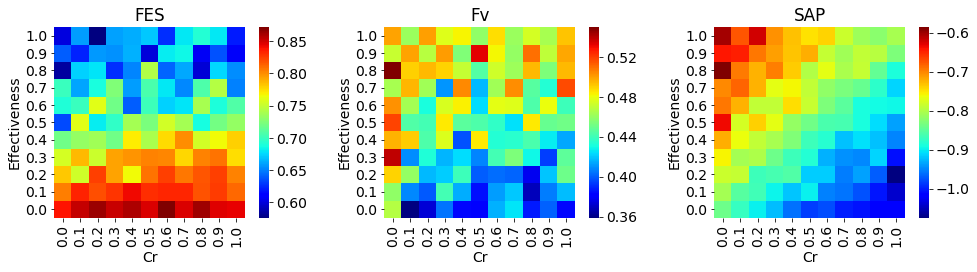

In [21]:
df = pd.read_csv("result1.csv")
fig = plt.figure(figsize=(14, 4))
plt.rcParams['font.size'] = 14
for index, value in enumerate(["FES", "VC", "SAP"]):
    fig.add_subplot(1, 3, index+1)
    """
    if value in ["FES", "VC"]:
        vmin = 0
        vmax = 1
    else:
        vmin = -1.1
        vmax = 0
    """
    title = value
    if value == "VC":
        title = "Fv"
    
    pivot = df.pivot("Effectiveness", "Cr", value)
    sns.heatmap(pivot, cmap='jet', square=True)
    plt.title(title)
    plt.gca().invert_yaxis()
    # plt.xticks(rotation='horizontal')
    plt.tight_layout()
fig.savefig('single_episode.png')

In [109]:
tmax = 1000
i0 = 0.005
im0 = 0.1
r0 = 0
s0 = 1-i0-im0
beta = 0.83
gamma = 1/3
kappa = 0.1
m = 1
result = pd.DataFrame({'Cr': [], 
                       'Effectiveness': [], 
                       'FES': [], 
                       'Fim': []})

params_range = np.arange(0, 1.01, 0.01)
for cr in params_range:
    for e in params_range:
        fs_hist , fi_hist, fim_hist, fr_hist = [s0], [i0], [im0], [r0]
        x = 1/(1+np.exp(cr/kappa))
        for t in range(1, tmax):
            fs_hist.append(fs_hist[t-1]*(1 - m*e*x - m*(1-x)*beta*fi_hist[t-1]))
            fi_hist.append(fi_hist[t-1]*(1 + m*(1-x)*beta*fs_hist[t-1] - gamma))
            fim_hist.append(fim_hist[t-1] + fs_hist[t-1]*m*e*x)
            fr_hist.append(fr_hist[t-1] + fi_hist[t-1]*gamma)
            if fi_hist[t] <= 0.00001:
                break
        
        new_result = pd.DataFrame([[format(cr,'.2f'), format(e, '.2f'), fr_hist[-1], fim_hist[-1]]], columns=['Cr', 'Effectiveness', 'FES', 'Fim'])
        result = result.append(new_result)

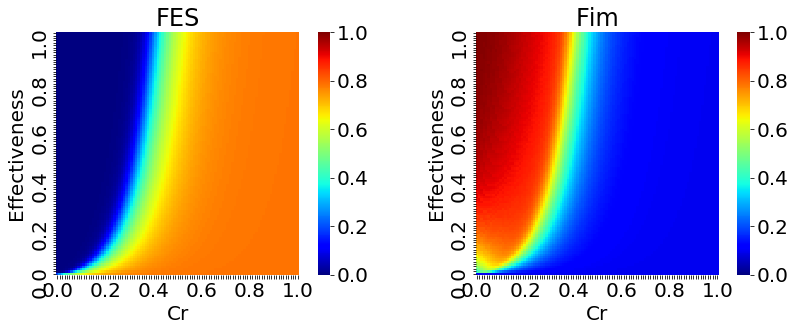

In [110]:
values = ['FES', 'Fim']
xaxis = []
for index, value in enumerate(params_range): 
    if index%20 == 0:
        xaxis.append(format(value, '.1f'))
    else:
        xaxis.append("")

fig = plt.figure(figsize=(12, 5))
for index, value in enumerate(values):
    pivot = result.pivot('Effectiveness', 'Cr', value)
    fig.add_subplot(1,2,index+1)
    sns.heatmap(pivot, vmin=0, vmax=1, square=True, cmap='jet', xticklabels=xaxis, yticklabels=xaxis)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.xticks(rotation='horizontal')
    plt.title(value)
plt.savefig(f'single_episode_im0_{im0}_m_{m}.png')
plt.show()